In [72]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
dt = ['int64']

for i in df.columns:
    if df[i].dtype in dt:
        df[i] = df[i].astype('int16')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int16  
 1   Glucose                   768 non-null    int16  
 2   BloodPressure             768 non-null    int16  
 3   SkinThickness             768 non-null    int16  
 4   Insulin                   768 non-null    int16  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int16  
 8   Outcome                   768 non-null    int16  
dtypes: float64(2), int16(7)
memory usage: 22.6 KB


In [7]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
df.shape

(768, 9)

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


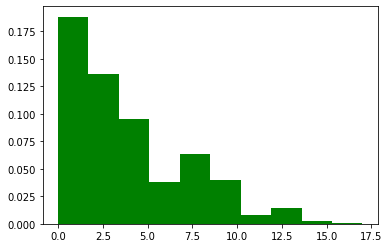

In [10]:
plt.hist(x = df['Pregnancies'], bins = 10, density = True, color='g')
plt.show()

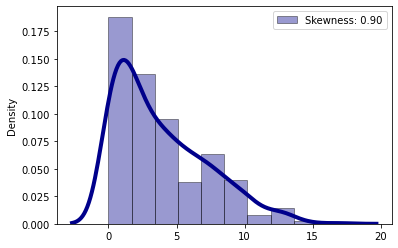

In [12]:
t = sns.distplot(df['Pregnancies'].to_numpy(), 
             label = 'Skewness: %.2f'%(df['Pregnancies'].skew()),
             hist=True, kde=True, 
             bins = 10, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

t.legend()
plt.show()

In [13]:
df[df['Pregnancies'] <= 5].shape

(549, 9)

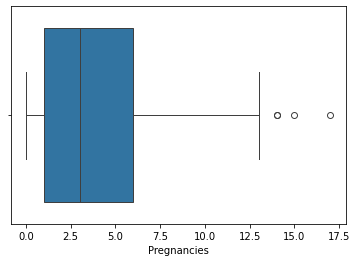

In [14]:
sns.boxplot(x = df['Pregnancies'])
plt.show()

In [15]:
# df.loc[(df['Pregnancies'] > 2) & (df['Pregnancies'] < 6)]

# Observations 
* As we can see the Pregnancies columns has some outliers
* The columns also has some skewness towards left
* Most of the values fall under 0-5 pregnancies

#### Skewness is a statistical measure of asymmetric distribution of data 
* Skewness = 0: Then normally distributed.
* Skewness > 0: Then more weight in the left tail of the distribution.
* Skewness < 0: Then more weight in the right tail of the distribution.
#### kurtosis helps determine if the distribution is heavy-tailed compared to a normal distribution
*  kurtosis identifies whether the tails of a given distribution contain extreme values.
*  Kurtosis in statistics describes the distribution of the data set. It depicts to what extent the data set points of a particular distribution differ from the data of a normal distribution. In addition, one may use it to determine whether a distribution contains extreme values.
* The values for asymmetry and kurtosis between -2 and +2 are considered acceptable in order to prove normal univariate distribution

0.15038273760948462


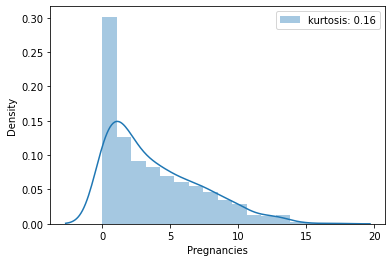

In [16]:
from scipy.stats import kurtosis 

# Calculate the kurtosis 
print(kurtosis(df['Pregnancies'], axis=0, bias=True))
t = sns.distplot(df['Pregnancies'],label="kurtosis: %.2f"%(df['Pregnancies'].kurtosis()) )
t.legend()
plt.show()

#### As we can see the kurtosis is between -2 and +2 so, in this case we can accept this as normal distribution.
# What if we wanted to deal with skewness ? There are several methods which are shown below.

# Log Transform
* This is most commonly used
* Easily done by np.log()
* Data should not have null values
* Handle values at 0 (np.log(0) encounters divide by zero)

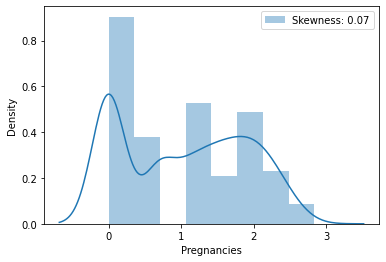

In [17]:
Preg_log = df["Pregnancies"].map(lambda i: np.log(i) if i > 0 else 0)
t = sns.distplot(Preg_log, label = "Skewness: %.2f"%(Preg_log.skew()) )
t.legend()

# Box Cox Transform
* Data must be positive
* Imported from scipy (expand the code below to see)

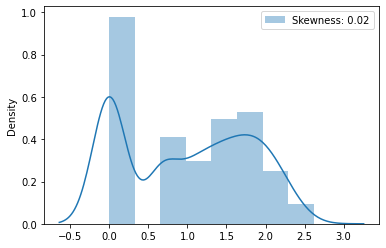

In [18]:
from scipy import stats
Preg_boxcox = df["Pregnancies"].map(lambda i: np.abs(i) if i < 0 else (i+1 if i==0 else i))
Preg_boxcox= stats.boxcox(Preg_boxcox)
Preg_boxcox= pd.Series(Preg_boxcox[0])
t = sns.distplot(Preg_boxcox,label="Skewness: %.2f"%(Preg_boxcox.skew()) )
t.legend()

# Square Root Transform
* Not generally used as taking square root shortens the range of variables
* Can be applied via np.sqrt()

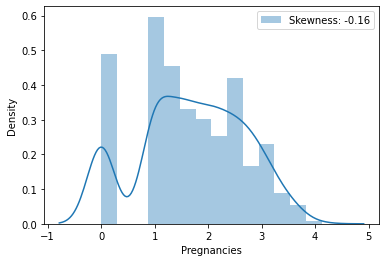

In [19]:
Preg_sq = df["Pregnancies"].map(lambda i: np.sqrt(i))
t = sns.distplot(Preg_sq,label="Skewness: %.2f"%(Preg_sq.skew()) )
t.legend()

In [20]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

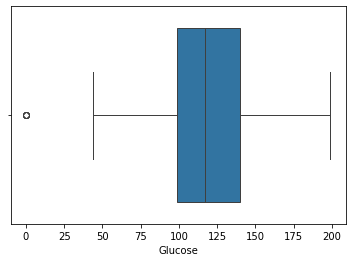

In [21]:
sns.boxplot(x = df['Glucose'])
plt.show()

In [22]:
df[df['Glucose'] < 25]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


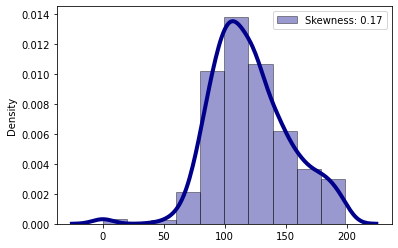

In [23]:
t1 = sns.distplot(df['Glucose'].to_numpy(), 
             label = 'Skewness: %.2f'%(df['Glucose'].skew()),
             hist=True, kde=True, 
             bins = 10, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

t1.legend()
plt.show()

0.6288133337300685


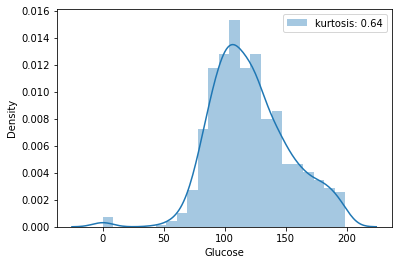

In [24]:
# Calculate the kurtosis 
print(kurtosis(df['Glucose'], axis=0, bias=True))
t1 = sns.distplot(df['Glucose'],label="kurtosis: %.2f"%(df['Glucose'].kurtosis()) )
t1.legend()
plt.show()

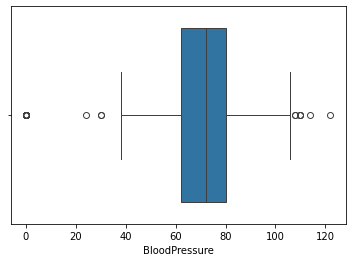

In [25]:
sns.boxplot(x = df['BloodPressure'])
plt.show()

In [26]:
df.loc[(df['BloodPressure'] > 100)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
43,9,171,110,24,240,45.4,0.721,54,1
84,5,137,108,0,0,48.8,0.227,37,1
106,1,96,122,0,0,22.4,0.207,27,0
177,0,129,110,46,130,67.1,0.319,26,1
207,5,162,104,0,0,37.7,0.151,52,1
362,5,103,108,37,0,39.2,0.305,65,0
369,1,133,102,28,140,32.8,0.234,45,1
440,0,189,104,25,0,34.3,0.435,41,1
549,4,189,110,31,0,28.5,0.680,37,0
658,11,127,106,0,0,39.0,0.190,51,0


5.138690662525438


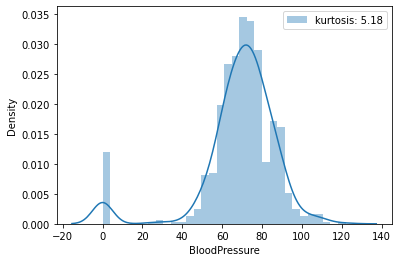

In [27]:
# Calculate the kurtosis 
print(kurtosis(df['BloodPressure'], axis=0, bias=True))
t2 = sns.distplot(df['BloodPressure'],label="kurtosis: %.2f"%(df['BloodPressure'].kurtosis()) )
t2.legend()
plt.show()

In [28]:
df[df['BloodPressure'] == 0].shape

(35, 9)

# Observations
* Blood Pressure is a very important feature for diabetes
* Blood Pressure has many outliers
* It's kurtosis is also high, which is around 5

In [29]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

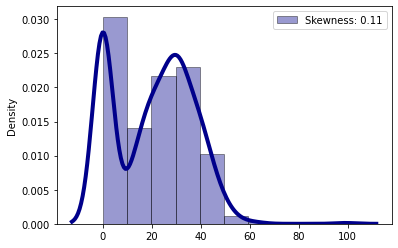

In [30]:
t3 = sns.distplot(df['SkinThickness'].to_numpy(), 
             label = 'Skewness: %.2f'%(df['SkinThickness'].skew()),
             hist=True, kde=True, 
             bins = 10, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

t3.legend()
plt.show()

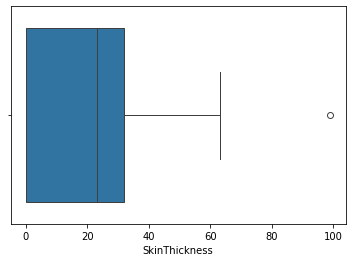

In [31]:
sns.boxplot(x = df['SkinThickness'])
plt.show()

In [32]:
df[df['SkinThickness'] > 60]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
445,0,180,78,63,14,59.4,2.420,25,1
579,2,197,70,99,0,34.7,0.575,62,1


-0.5244944887652805


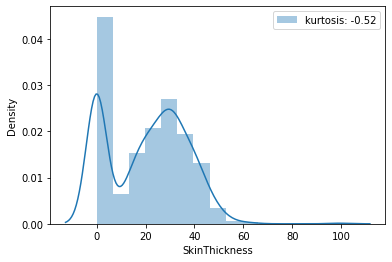

In [33]:
# Calculate the kurtosis 
print(kurtosis(df['SkinThickness'], axis=0, bias=True))
t3 = sns.distplot(df['SkinThickness'],label="kurtosis: %.2f"%(df['SkinThickness'].kurtosis()) )
t3.legend()
plt.show()

In [34]:
df[df['SkinThickness'] <= 0].shape

(227, 9)

In [35]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

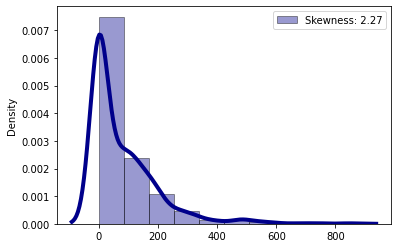

In [36]:
t3 = sns.distplot(df['Insulin'].to_numpy(), 
             label = 'Skewness: %.2f'%(df['Insulin'].skew()),
             hist=True, kde=True, 
             bins = 10, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

t3.legend()
plt.show()

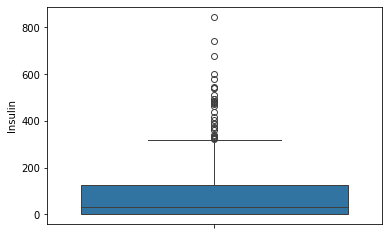

In [37]:
sns.boxplot(df['Insulin'])
plt.show()

7.159574916971424


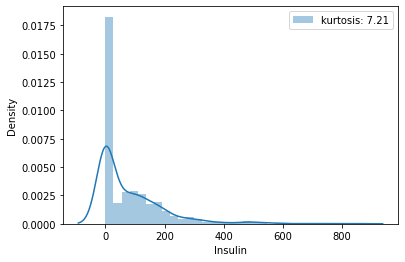

In [38]:
# Calculate the kurtosis 
print(kurtosis(df['Insulin'], axis=0, bias=True))
t4 = sns.distplot(df['Insulin'],label="kurtosis: %.2f"%(df['Insulin'].kurtosis()) )
t4.legend()
plt.show()

In [39]:
df[df['Insulin'] > 250]['Outcome'].value_counts()

Outcome
1    29
0    27
Name: count, dtype: int64

# Observation
* Insulin column has many outliers 
* It's kurtosis score is also above 3, which means that it's outlier can have an affect

In [40]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

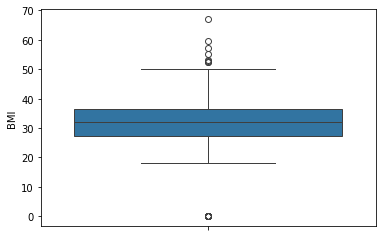

In [41]:
sns.boxplot(df['BMI'])
plt.show()

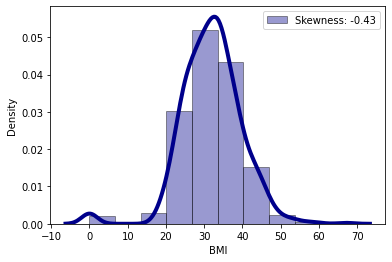

In [42]:
t4 = sns.distplot(df['BMI'], 
             label = 'Skewness: %.2f'%(df['BMI'].skew()),
             hist=True, kde=True, 
             bins = 10, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

t4.legend()
plt.show()

3.2612574203612645


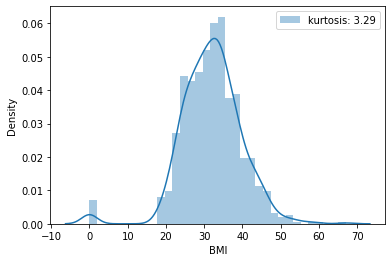

In [43]:
# Calculate the kurtosis 
print(kurtosis(df['BMI'], axis=0, bias=True))
t4 = sns.distplot(df['BMI'],label="kurtosis: %.2f"%(df['BMI'].kurtosis()) )
t4.legend()
plt.show()

In [44]:
df.loc[(df['BMI'] < 20) | (df['BMI'] > 50)]['Outcome'].value_counts()

Outcome
0    24
1     8
Name: count, dtype: int64

In [45]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

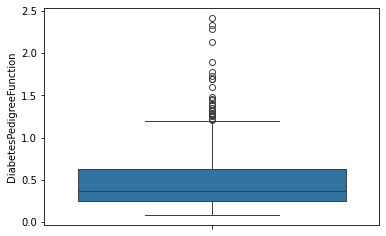

In [46]:
sns.boxplot(df['DiabetesPedigreeFunction'])
plt.show()

In [47]:
df.loc[(df['DiabetesPedigreeFunction'] > 1.2)]['Outcome'].value_counts()

Outcome
1    17
0    12
Name: count, dtype: int64

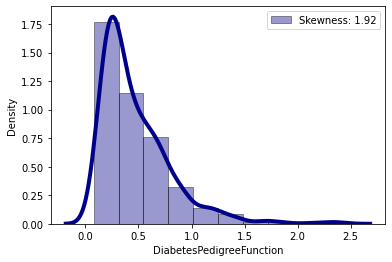

In [48]:
t5 = sns.distplot(df['DiabetesPedigreeFunction'], 
             label = 'Skewness: %.2f'%(df['DiabetesPedigreeFunction'].skew()),
             hist=True, kde=True, 
             bins = 10, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

t5.legend()
plt.show()

5.550792047551203


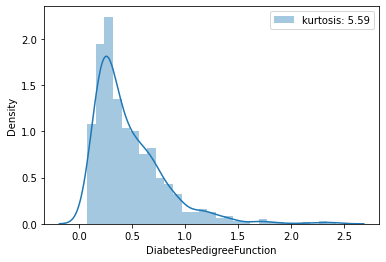

In [49]:
# Calculate the kurtosis 
print(kurtosis(df['DiabetesPedigreeFunction'], axis=0, bias=True))
t4 = sns.distplot(df['DiabetesPedigreeFunction'],label="kurtosis: %.2f"%(df['DiabetesPedigreeFunction'].kurtosis()) )
t4.legend()
plt.show()

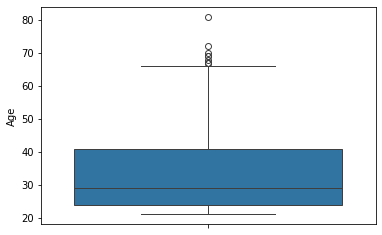

In [50]:
sns.boxplot(df['Age'])
plt.show()

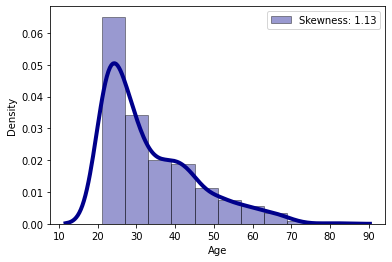

In [51]:
t6 = sns.distplot(df['Age'], 
             label = 'Skewness: %.2f'%(df['Age'].skew()),
             hist=True, kde=True, 
             bins = 10, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

t6.legend()
plt.show()

0.6311769413798585


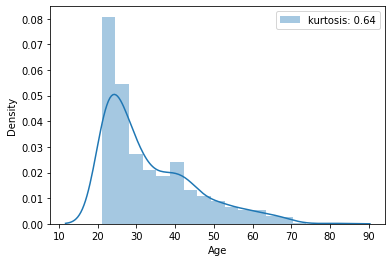

In [52]:
# Calculate the kurtosis 
print(kurtosis(df['Age'], axis=0, bias=True))
t6 = sns.distplot(df['Age'],label="kurtosis: %.2f"%(df['Age'].kurtosis()) )
t6.legend()
plt.show()

In [53]:
df[df['Age'] > 65]['Outcome'].value_counts()

Outcome
0    9
1    4
Name: count, dtype: int64

# Bivariate Analysis

In [54]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

<Axes: >

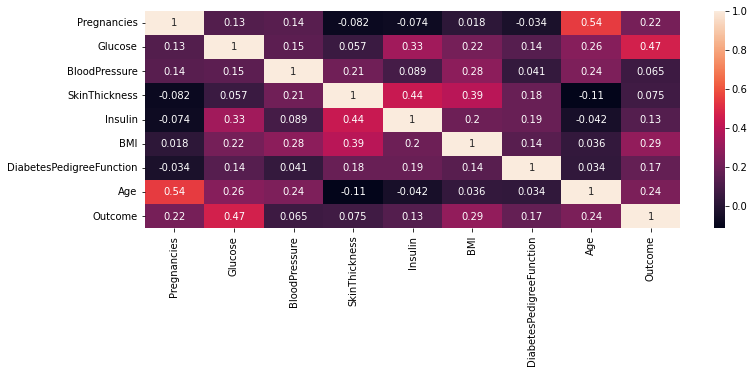

In [55]:
plt.figure(figsize = (12, 4))
sns.heatmap(df.corr(), annot = True)

In [56]:
# Assumptions

# Logistic regression requires the observations to be independent of each other
# logistic regression requires there to be little or no multicollinearity
# logistic regression typically requires a large sample size.  
# A general guideline is that you need at minimum of 10 cases with the least frequent outcome for each independent variable in your model. 
# For example, if you have 5 independent variables and the expected probability of your least frequent outcome is .10, 
# then you would need a minimum sample size of 500 (10*5 / .10)

<Axes: xlabel='Outcome', ylabel='Glucose'>

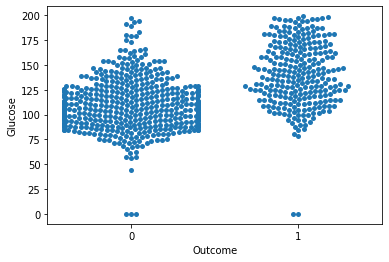

In [57]:
sns.swarmplot(x = 'Outcome',y = 'Glucose', data = df)

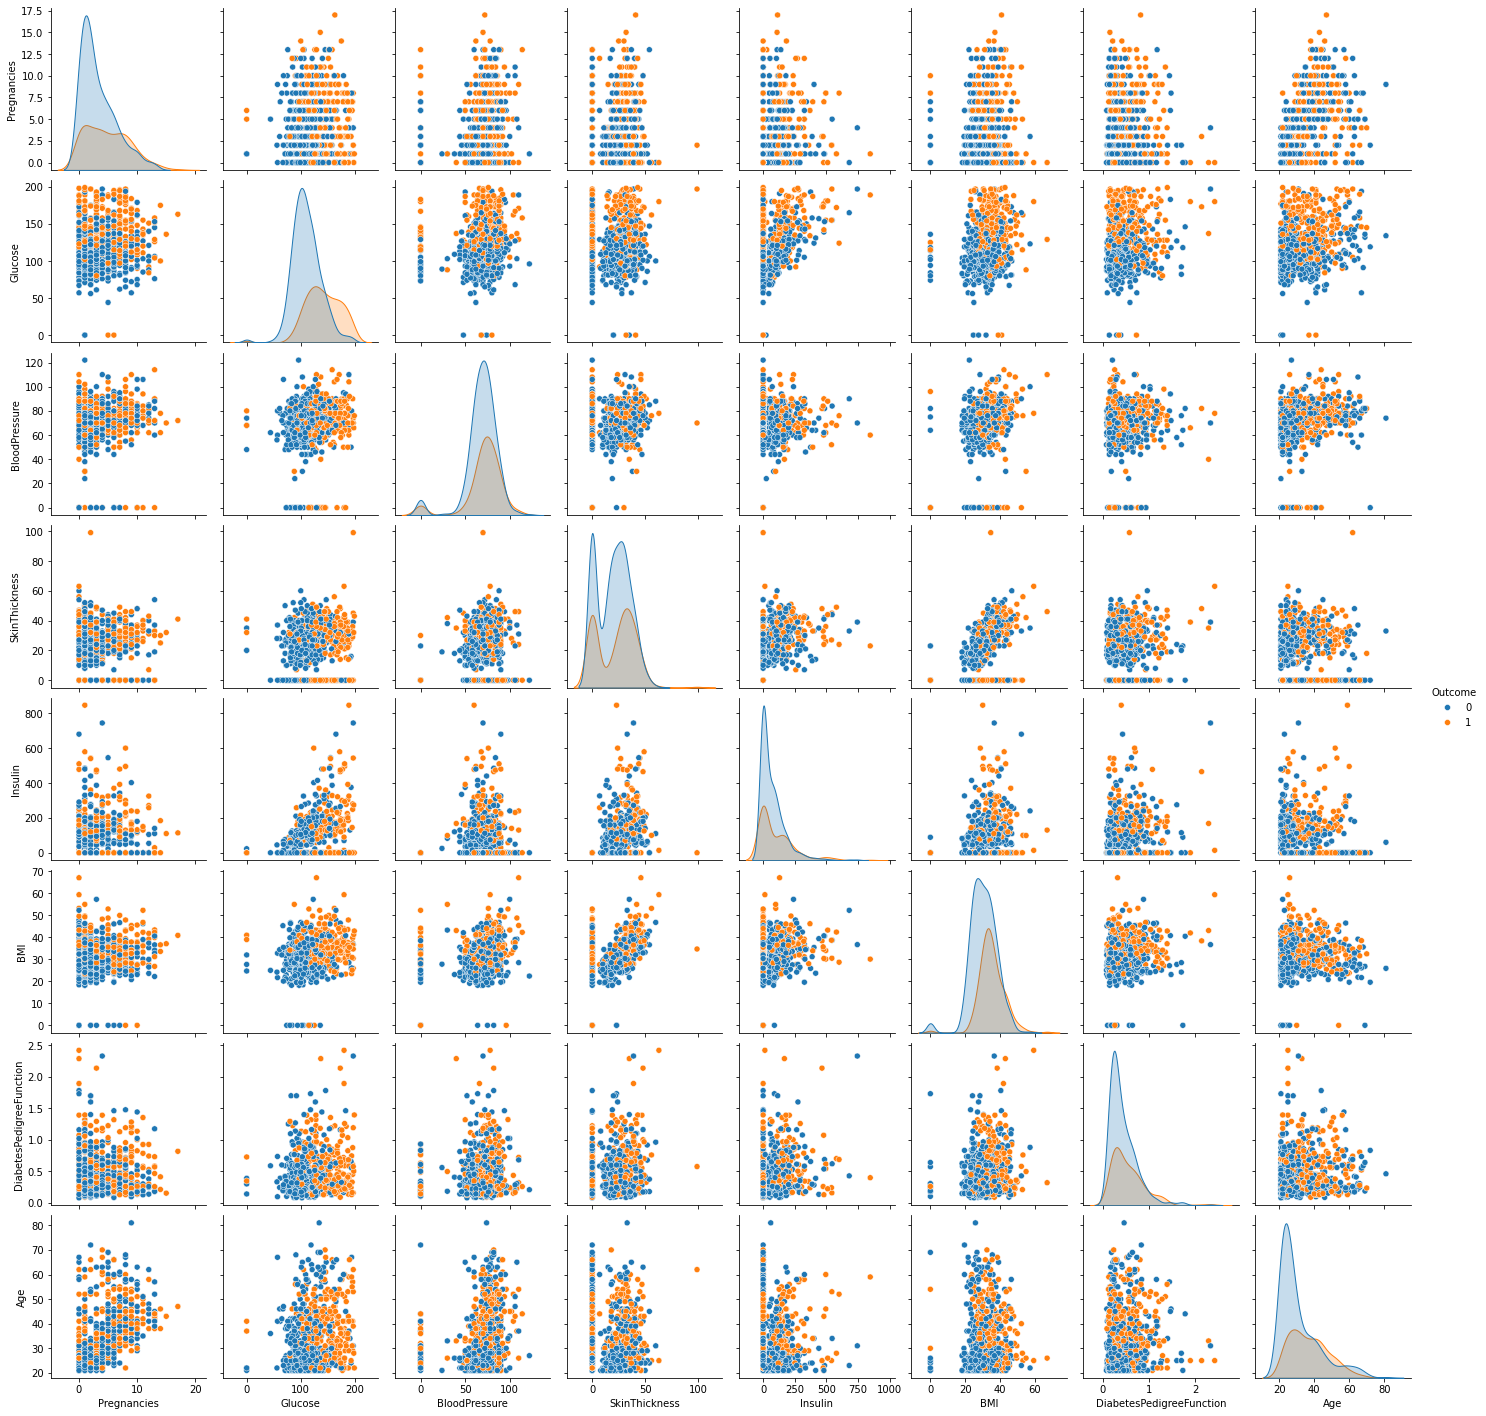

In [58]:
sns.pairplot(df, hue = 'Outcome')
plt.show()

In [59]:
X = df[['Pregnancies', 'Glucose', 'SkinThickness', 'BMI', 'Age']]
y = df['Outcome']

In [60]:
X.head()

,Pregnancies,Glucose,SkinThickness,BMI,Age
0,6,148,35,33.6,50
1,1,85,29,26.6,31
2,8,183,0,23.3,32
3,1,89,23,28.1,21
4,0,137,35,43.1,33


In [61]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int16

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 2, stratify = y)

In [63]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB

In [64]:
mnb = MultinomialNB()
gnb = GaussianNB()
bnb = BernoulliNB()

In [69]:
bnb.fit(X_train, y_train)

BernoulliNB()

In [70]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix
#let us get the predictions using the classifier we had fit above
y_pred1 = bnb.predict(X_test)

In [66]:
mnb.fit(X_train, y_train)

MultinomialNB()

Text(51.0, 0.5, 'Real Labels')

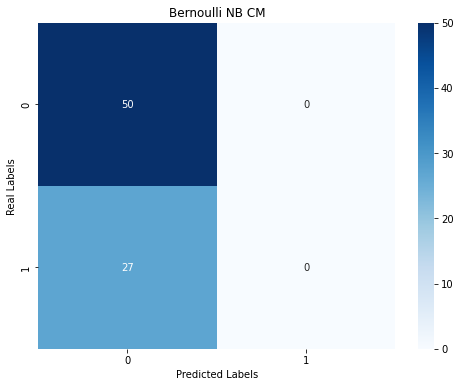

In [71]:
plt.figure(figsize = (8,6))

sns.heatmap(confusion_matrix(y_test, y_pred1), annot = True, 
            fmt='', cmap='Blues')

plt.title('Bernoulli NB CM')
plt.xlabel('Predicted Labels')
plt.ylabel('Real Labels')

In [168]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [169]:
lr.fit(X_train, y_train)

LogisticRegression()

In [67]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix
#let us get the predictions using the classifier we had fit above
y_pred = mnb.predict(X_test)

Text(51.0, 0.5, 'Real Labels')

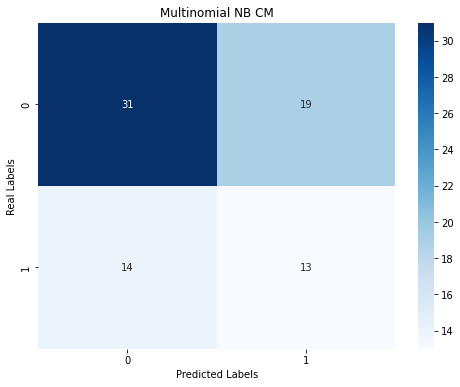

In [68]:
plt.figure(figsize = (8,6))

sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, 
            fmt='', cmap='Blues')

plt.title('Multinomial NB CM')
plt.xlabel('Predicted Labels')
plt.ylabel('Real Labels')

In [173]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix
#let us get the predictions using the classifier we had fit above
y_pred = lr.predict(X_test)

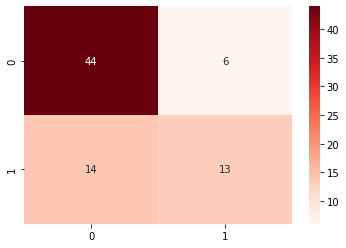

In [200]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt='', cmap='Reds')
plt.show()

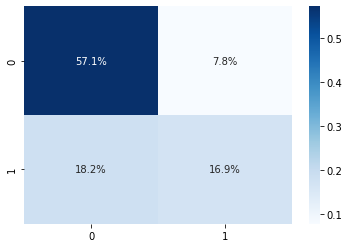

In [179]:
sns.heatmap(confusion_matrix(y_test, y_pred)/np.sum(confusion_matrix(y_test, y_pred)), annot=True, 
            fmt='.1%', cmap='Blues')
plt.show()

In [201]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.88      0.81        50
           1       0.68      0.48      0.57        27

    accuracy                           0.74        77
   macro avg       0.72      0.68      0.69        77
weighted avg       0.73      0.74      0.73        77



In [203]:
from sklearn.metrics import roc_curve
y_pred_proba = lr.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

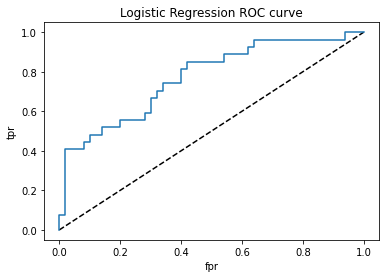

In [204]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr, label = 'Logistic')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Logistic Regression ROC curve')
plt.show()

In [205]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,y_pred_proba)

0.7703703703703704

In [231]:
from sklearn.model_selection import GridSearchCV

param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet'],
    'C' : np.logspace(-1, 1, 20),
    'solver' : ['lbfgs','newton-cg','liblinear'],
    'max_iter' : [100, 1000]
    }
]

In [232]:
clf = GridSearchCV(lr, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)

In [233]:
best_clf = clf.fit(X,y)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


In [234]:
best_clf.best_estimator_

LogisticRegression(C=0.1)

In [235]:
print (f'Accuracy - : {best_clf.score(X,y):.3f}')

Accuracy - : 0.768


In [252]:
from sklearn.svm import SVC
svc = SVC(probability = True)

In [253]:
svc.fit(X_train, y_train)

SVC(probability=True)

In [254]:
y_pred1 = svc.predict(X_test)

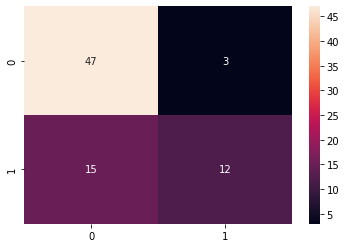

In [255]:
sns.heatmap(confusion_matrix(y_test, y_pred1), annot = True)
plt.show()

In [256]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.76      0.94      0.84        50
           1       0.80      0.44      0.57        27

    accuracy                           0.77        77
   macro avg       0.78      0.69      0.71        77
weighted avg       0.77      0.77      0.75        77



In [257]:
y_pred_proba1 = svc.predict_proba(X_test)[:,1]
roc_auc_score(y_test,y_pred_proba1)

0.7525925925925925

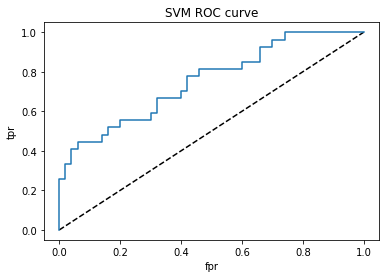

In [262]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba1)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr, label = 'SVM')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('SVM ROC curve')
plt.show()

In [242]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth = 2)

In [243]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2)

In [244]:
y_pred2 = rf.predict(X_test)

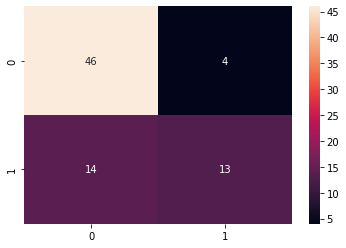

In [247]:
sns.heatmap(confusion_matrix(y_test, y_pred2), annot = True)
plt.show()

In [246]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.77      0.92      0.84        50
           1       0.76      0.48      0.59        27

    accuracy                           0.77        77
   macro avg       0.77      0.70      0.71        77
weighted avg       0.77      0.77      0.75        77



In [259]:
y_pred_proba2 = rf.predict_proba(X_test)[:,1]
roc_auc_score(y_test,y_pred_proba2)

0.7888888888888889

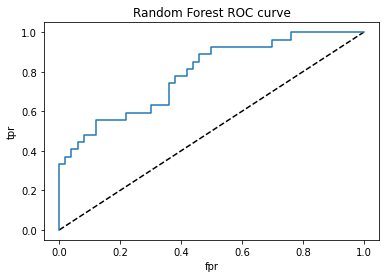

In [261]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba2)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr, label = 'Random Forest')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Random Forest ROC curve')
plt.show()

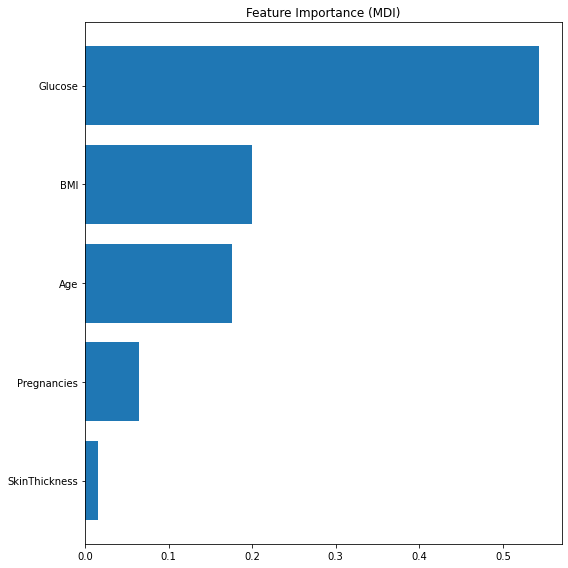

In [250]:
from sklearn.inspection import permutation_importance
#
# Get Feature importance data using feature_importances_ attribute
#
feature_importance = rf.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(8, 8))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(X.columns)[sorted_idx])
plt.title('Feature Importance (MDI)')
result = permutation_importance(rf, X_test, y_test, n_repeats = 10,
                                random_state = 42, n_jobs = 2)
sorted_idx = result.importances_mean.argsort()
fig.tight_layout()
plt.show()